# Location visualisation
This is a jupyter notebook that shows where each weather stations data is placed. We use the location (lattitude longitude) from the initial webpage and visualise them.

In [15]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pathlib import Path

%matplotlib inline

In [16]:
# shape file
shp_file = Path.cwd().parent.parent / "input" / "counties_in_uk" / "CTYUA_MAY_2023_UK_BGC.shp"
gdf_counties = gpd.read_file(shp_file)
gdf_counties.crs


<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [17]:
gdf_counties.head(3)

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,3bf43124-f19b-410c-a4d7-fe936cd94d88,"MULTIPOLYGON (((449812.866 525823.719, 449819...."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,f97de8d7-f645-4919-8499-eac4f1fa02e0,"MULTIPOLYGON (((446860 517200.3, 446854.898 51..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,ef76d83c-4b2e-4415-8a89-7bbe66ad618f,"MULTIPOLYGON (((451747.397 520561.1, 451787.40..."


In [18]:
# location of weather stations
location_filename = "location_webpages"
input_location_filepath = Path.cwd().parent.parent / "input" / f"{location_filename}.csv"
df_stations = pd.read_csv(input_location_filepath)
df_stations[["longitude","latitude"]] = df_stations["Location"].str.split(pat=",", n=2,expand=True)


In [19]:
# create geopandas df with location points
gdf_stations = gpd.GeoDataFrame(
    df_stations, geometry=gpd.points_from_xy(df_stations.longitude, df_stations.latitude), crs="EPSG:4326"
).to_crs("EPSG:27700")


Text(0.5, 0.98, 'Counties in the UK')

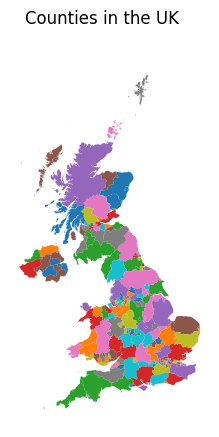

In [20]:
fig, ax = plt.subplots()
gdf_counties.plot(ax=ax, column="CTYUA23NM")
ax.set_axis_off()
fig.suptitle("Counties in the UK")

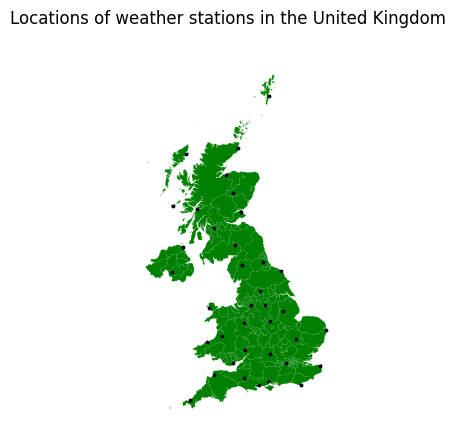

In [21]:
# combine in a visualisation
fig, ax = plt.subplots()
fig.suptitle('Locations of weather stations in the United Kingdom')
gdf_counties.plot(ax=ax, color="green")
gdf_stations.plot(ax=ax,color="blue", edgecolor="black", markersize=3)
ax.set_axis_off()